# Ejemplo de dataset mas complicado


En este ejemplo vamos a usar un Boosted Decision Tree para resolver otro problema de clasificacion mas complejo

In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms

In [2]:
### cargamos los datos MNIST
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
X = mnist.data.numpy().reshape(-1, 28*28) / 255.0  
y = mnist.targets.numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Como vemos, son digitos escritos a mano en matrices de pixels de 28*28

Text(0.5, 1.05, 'Ejemplos del dataset MNIST')

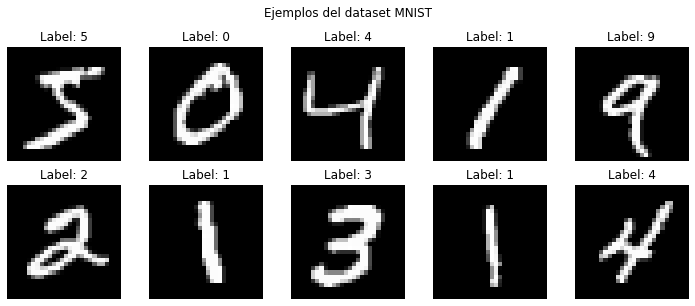

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(mnist.data[i].numpy(), cmap="gray")
    ax.set_title(f"Label: {mnist.targets[i]}")
    ax.axis("off")
plt.tight_layout()
plt.suptitle("Ejemplos del dataset MNIST", y=1.05)

In [4]:
bdt = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
bdt.fit(X_train, y_train)

y_pred_train = bdt.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = bdt.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy en train: {acc_train:.4f}")
print(f"Accuracy en test: {acc_test:.4f}")

Accuracy en train: 0.8446
Accuracy en test: 0.8377


Text(0.5, 1.05, 'Ejemplos clasificados (BDT)')

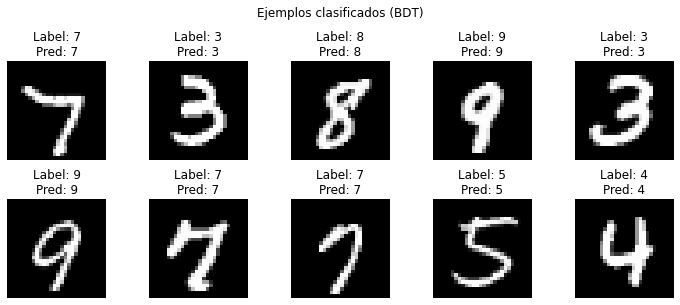

In [5]:

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_test[i]}\nPred: {y_pred_test[i]}")
    ax.axis("off")
plt.tight_layout()
plt.suptitle("Ejemplos clasificados (BDT)", y=1.05)